In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, I/O
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from IPython.display import display
import math
import re
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = './data'
df = pd.read_csv(path+'/songs_df_final.csv')

display(df.info())
display(df.describe().T)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             4800 non-null   object 
 1   primary_artist    4800 non-null   object 
 2   danceability      4800 non-null   float64
 3   energy            4800 non-null   float64
 4   key               4800 non-null   object 
 5   loudness          4800 non-null   float64
 6   mode              4800 non-null   object 
 7   speechiness       4800 non-null   float64
 8   acousticness      4800 non-null   float64
 9   instrumentalness  4800 non-null   float64
 10  liveness          4800 non-null   float64
 11  valence           4800 non-null   float64
 12  tempo             4800 non-null   float64
 13  time_signature    4800 non-null   int64  
 14  duration_s        4800 non-null   int64  
 15  year              4800 non-null   int64  
 16  genres            4800 non-null   object 


None

,count,mean,std,min,25%,50%,75%,max
danceability,4800.0,0.630908,0.147346,0.135000,0.539000,0.644000,0.734000,0.980
energy,4800.0,0.663262,0.189208,0.026400,0.534750,0.686000,0.817000,0.996
loudness,4800.0,-7.941893,3.454099,-24.709000,-10.088500,-7.247000,-5.304500,-0.140
speechiness,4800.0,0.071971,0.075093,0.022500,0.032700,0.043100,0.071825,0.911
acousticness,4800.0,0.199933,0.226299,0.000005,0.026075,0.106000,0.305000,0.978
instrumentalness,4800.0,0.028952,0.118180,0.000000,0.000000,0.000009,0.000961,0.985
liveness,4800.0,0.173598,0.141214,0.015000,0.083575,0.119000,0.223000,0.989
valence,4800.0,0.597184,0.240588,0.038100,0.410000,0.615500,0.800000,0.989
tempo,4800.0,119.899201,26.666675,50.937000,99.981000,119.536500,133.935750,210.857
time_signature,4800.0,3.975208,0.209212,1.000000,4.000000,4.000000,4.000000,5.000


,title,primary_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,duration_s,year,genres,lyrics,nltk,Happy,Angry,Surprise,Sad,Fear
0,Let It Be - Remastered 2009,The Beatles,0.443,0.403,C,-8.339,Major,0.0322,0.6310,0.000000,...,243,1970,['rock'],When I find myself in times of trouble Mother ...,0.9856,0.00,0.35,0.00,0.05,0.60
1,Cecilia,Simon & Garfunkel,0.755,0.876,C,-8.867,Major,0.0362,0.3570,0.000005,...,175,1970,"['folk', 'rock']",Cilia youre breaking my heart. Youre shaking m...,0.9716,0.17,0.00,0.17,0.40,0.27
2,Son of a Preacher Man,Aretha Franklin,0.474,0.473,D,-11.454,Major,0.0601,0.5450,0.000001,...,199,1970,"['blues', 'soul']",Billy Ray was a preachers son. And when his da...,0.9271,0.00,0.20,0.30,0.40,0.10
3,Who'll Stop The Rain,Creedence Clearwater Revival,0.598,0.797,G,-6.793,Major,0.0332,0.0424,0.000407,...,147,1970,['rock'],Long as I remember the rain been coming down. ...,0.1280,0.12,0.06,0.47,0.12,0.24
4,Big Yellow Taxi,Joni Mitchell,0.611,0.470,E,-9.135,Major,0.0356,0.5790,0.000000,...,135,1970,"['folk', 'rock']",They paved paradise and put up a parking lot. ...,0.9091,0.03,0.10,0.03,0.41,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,Ladbroke Grove,AJ Tracey,0.902,0.839,B,-9.447,minor,0.2080,0.0933,0.000000,...,191,2019,"['dance/electronic', 'hip hop', 'rock']",No one sees. No one. One. No one sees. No one ...,-0.9618,0.00,0.00,0.00,0.00,1.00
4796,Slide Away,Miley Cyrus,0.530,0.538,F,-6.672,Major,0.0335,0.1700,0.000003,...,234,2019,['pop'],Wooooh wooooh wooooh. Wooooh wooooh wooooh. On...,-0.7753,0.09,0.36,0.09,0.27,0.18
4797,The Git Up,Blanco Brown,0.847,0.678,A,-8.635,Major,0.1090,0.0669,0.000000,...,201,2019,['rap'],Right now. I just need you to get real loose. ...,0.9853,0.33,0.00,0.06,0.33,0.28
4798,Easier,5 Seconds of Summer,0.562,0.460,F,-4.173,Major,0.2590,0.4760,0.000000,...,158,2019,['pop'],Is it easier to stay Is it easier to go. I don...,0.9900,0.29,0.29,0.00,0.21,0.21


In [ ]:
# Reformat 'mode' and 'key' columns
# df.drop_duplicates()
# df['mode'].replace({1: 'Major', 0: 'minor'}, inplace=True)
# key_dict = { 0: 'C', 1: 'C♯/D♭', 2: 'D', 3: 'D♯/E♭',
#              4: 'E', 5: 'F', 6: 'F♯/G♭', 7: 'G',
#              8: 'G♯/A♭', 9: 'A', 10: 'A♯/B♭', 11: 'B',
#              -1: 'Unknown'
#            }
# df['key'].replace(key_dict, inplace=True)

# df

In [ ]:
songs_per_year = (df.year.value_counts().rename_axis('year').reset_index(name='songs'))

plt.figure(figsize=(18,6))
ax = sns.barplot(x = 'year', y = 'songs', data = songs_per_year)
plt.ylabel('Number of songs', size = 15)
plt.xlabel('Year', size = 15)
plt.title('Number of songs released per year')
plt.xticks(fontsize=12, rotation = 50)
ax.bar_label(ax.containers[0],size = 10)
plt.show()

# The df is missing data from 1997 and 2004

# **Analysis**

## Distribution of artists, genres and music features

In [ ]:
# Histogram
df.hist(bins=25,figsize=(20,15))
plt.show()

In [ ]:
# Descending counts of keys
print('Common keys: \n', df['key'].value_counts().sort_values(ascending=False), '\n')

# Descending counts of appearances of artists
artists = df['primary_artist'].value_counts().sort_values(ascending=False)
artists.columns = ['artist', 'appearances']
print('Common artists: \n', artists)

fig = plt.figure(figsize = (15,7))
df.groupby('primary_artist')['title'].agg(len).sort_values(ascending = False)[:30].plot(kind = 'bar')
plt.xlabel('Artist Name', fontsize = 20)
plt.ylabel('Track Counts', fontsize = 20)
plt.title('Top 30 artists with most appearances on the chart', fontsize = 30)

In [ ]:
artists = df['primary_artist'].value_counts()
px.pie(names=['1 song', '>1 songs'], 
       values=[len(artists.loc[lambda x:x==1]), 
          len(artists)-len(artists.loc[lambda x:x==1])
         ],
       title="Artists with only 1 hit versus artists with more than 1 hit",
      ).show()

px.pie(values=[artists[:50].sum(),4800-artists[:50].sum()], 
       names=['top 50 artists',f'remaining {len(artists)-50} artists'], 
       title="Distribution of songs belonging to top 50 artists",
      )

In [ ]:
fig=px.histogram(df.groupby('genres',as_index=False).count().sort_values(by='title',ascending=False),x='genres',y='title',template='simple_white',marginal='box',title='<b>Total songs based on genres</b>')
fig.update_layout(title_x=0.5)

In [ ]:
# Some pie charts of key, mode and time signature
# ig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
# key_labels = sorted(df['key'].unique())
# key_sizes = df['key'].value_counts().sort_index().to_list()
# wedges, texts = ax.pie(key_sizes, wedgeprops=dict(width=0.5), startangle=-40)
# bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
# kw = dict(arrowprops=dict(arrowstyle="-"),
#           bbox=bbox_props, zorder=0, va="center")

# for i, p in enumerate(wedges):
#     ang = (p.theta2 - p.theta1)/2. + p.theta1
#     y = np.sin(np.deg2rad(ang))
#     x = np.cos(np.deg2rad(ang))
#     horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#     connectionstyle = "angle,angleA=0,angleB={}".format(ang)
#     kw["arrowprops"].update({"connectionstyle": connectionstyle})
#     ax.annotate(key_labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
#                 horizontalalignment=horizontalalignment, **kw)

# ax.set_title("Distribution of keys")
# plt.show()

# mode_sizes = df['mode'].value_counts().sort_index().to_list()
# mode_labels = sorted(df['mode'].unique())
# explode = (0, 0)
# fig2, ax2 = plt.subplots()
# ax2.pie(mode_sizes, explode=explode, labels=mode_labels, autopct='%1.1f%%', shadow=True, startangle=90)
# ax2.axis('equal') 
# ax2.set_title("Distribution of modes")
# plt.show()

fig=px.pie(df.groupby('key',as_index=False).count().sort_values(by='title',ascending=False),names='key',values='title',hole=.5,template='simple_white',title='<b>Key')
fig.update_layout(title_x=0.5)
fig.show()

fig=px.pie(df.groupby('mode',as_index=False).count().sort_values(by='title',ascending=False),names='mode',values='title',hole=.5,template='simple_white',title='<b>Mode')
fig.update_layout(title_x=0.5)
fig.show()

fig=px.pie(df.groupby('time_signature',as_index=False).count().sort_values(by='title',ascending=False),names='time_signature',values='title',hole=.5,template='simple_white',title='<b>Time signature')
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
# Some graphs of the features
fig,ax = plt.subplots(4,2,figsize=(20,20))
sns.distplot(df['tempo'],color='red',ax=ax[0][0],bins=10)
sns.distplot(df['energy'],ax=ax[0][1],color='violet',bins=10)
sns.distplot(df['loudness'],ax=ax[1][0],color='yellow',bins=10)
sns.distplot(df['liveness'],ax=ax[1][1],color='blue',bins=10)
sns.distplot(df['acousticness'],ax=ax[2][0],color='green',bins=10)
sns.distplot(df['duration_s'],ax=ax[2][1],color='black',bins=10)
sns.distplot(df['speechiness'],ax=ax[3][0],color='orange',bins=10)
sns.distplot(df['valence'],ax=ax[3][1],color='purple',bins=10)
plt.show()

In [ ]:
fig,ax = plt.subplots(3,2,figsize=(20,20))
sns.distplot(df['nltk'],ax=ax[0][0],bins=10)
sns.distplot(df['Happy'],ax=ax[0][1],color='pink',bins=10)
sns.distplot(df['Angry'],ax=ax[1][0],color='brown',bins=10)
sns.distplot(df['Sad'],ax=ax[1][1],color='blue',bins=10)
sns.distplot(df['Surprise'],ax=ax[2][0],color='yellow',bins=10)
sns.distplot(df['Fear'],ax=ax[2][1],color='gray',bins=10)

## Changes of features over time or based on artist

In [ ]:
def get_average_x_by_y(x, y):
    return (df.groupby([y]).agg({str(x):'mean'}))

print('Most fast-paced artists')
artist_tempo = df.groupby(['primary_artist']).agg({str('tempo'):'mean'})
display(artist_tempo.sort_values('tempo', ascending=False).head(10))

print('Loudest artists')
artist_loudness = df.groupby(['primary_artist']).agg({str('loudness'):'mean'})
display(artist_loudness.sort_values('loudness', ascending=False).head(10))

def get_average_over_year(feature):
    data = (df.groupby(['year']).agg({str(feature):'mean'}))
    chart_title = 'Average ' + str(feature) + ' changes over time'
    # row_gap = int(math.ceil((year-1970)/9))
    # line_chart = data.plot(title=chart_title, xticks=range(1970, year+2, row_gap))
    # line_chart = px.line(df, x="year", y=feature, title=chart_title)
    line_chart = sns.lineplot(data=df, x="year", y=feature)
    plt.show()

get_average_over_year('tempo')
get_average_over_year('duration_s')
get_average_over_year('liveness')
get_average_over_year('speechiness')

## Correlation between the features

In [ ]:
# Heatmap
features = df.drop(["primary_artist", "title"], axis=1)
corr = features.corr()
fig, ax = plt.subplots(figsize=(15,10))         
sns.heatmap(corr, vmin=0, vmax=1, cmap="Blues", cbar=True, linewidths=1, linecolor='black', annot=True)

In [ ]:
# Correlation between energy and other features
px.scatter(df,x='energy',y='danceability',color='danceability',template='simple_white',title='<b>Energy Vs Danceability', trendline="ols").show()
px.scatter(df,x='energy',y='loudness',color='loudness',template='simple_white',title='<b>Energy Vs Loudness', trendline="ols").show()
px.scatter(df,x='energy',y='speechiness',color='speechiness',template='simple_white',title='<b>Energy Vs Speechiness', trendline="ols").show()

In [ ]:
# Correlation between some other features
px.scatter(df,x='loudness',y='acousticness',color='acousticness',template='simple_white',title='<b>Loudness Vs Acousticness', trendline="ols").show()
px.scatter(df,x='valence',y='danceability',color='danceability',template='simple_white',title='<b>Valence Vs Danceability', trendline="ols").show()
px.scatter(df,x='danceability',y='Surprise',color='Surprise',template='simple_white',title='<b>Danceability Vs Surprised', trendline="ols").show()

## Frequency of genre and of words of the lyrics

In [ ]:
# Reformat the genres column
import ast
import itertools

genres_list = []
for entry in df['genres']:
    new_entry = [n.strip() for n in ast.literal_eval(entry)]
    genres_list.append(new_entry)
    
joined_list = list(itertools.chain.from_iterable(genres_list))

# Genres wordcloud
genres = ' '.join(joined_list)
rcParams['figure.figsize'] = (12,8)
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True, 
                      background_color='black', colormap='rainbow',
                     max_words=200, max_font_size=40).generate(genres)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [ ]:
# Lyrics wordcloud
from PIL import Image
from nltk.corpus import stopwords
import string
lyrics_list = df['lyrics'].to_list()
lyrics_words = " ".join(map(str,lyrics_list))
# punctuations = list(string.punctuation)
stop_words_en = list(stopwords.words("english"))
stop_words_es = list(stopwords.words("spanish"))
forbidden = ['(',')',"'",',','oh',"'s", 'yo',"'ll", 'el', "'re","'m","oh-oh","'d", "n't", "``", "ooh", "uah", "'em", "'ve", "eh", "pa", "brr", "yeah",
            'Im', 'Ill', 'Id', 'your', 'youre', "you're", 'youll', 'u'] 
stop_words_all = set(stop_words_en + stop_words_es + forbidden)

mask = np.array(Image.open('./mask_guitar.png'))
wordcloud = WordCloud(stopwords=stop_words_all, background_color='white', 
                      max_words=200, mask=mask
                     ).generate(lyrics_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# import nltk
# from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
# from textblob import TextBlob
# from textblob import Blobber
# from textblob.sentiments import NaiveBayesAnalyzer

# sia = SIA()
# blobber = Blobber(analyzer=NaiveBayesAnalyzer())

# def get_sentiment_scores(content):
#     sia_scores = sia.polarity_scores(content)
    
#     return pd.Series({
#         'content': content,
#         'nltk': sia_scores['compound'],
# })

# for idx, lyrics in enumerate(df['lyrics']):
#     if type(lyrics) is not float:            
#         scores = get_sentiment_scores(lyrics)
#         df.at[idx, 'nltk'] = scores['nltk']    

In [ ]:
# import text2emotion as te

# for idx, lyrics in enumerate(df['lyrics']):
#     if type(lyrics) is not float:            
#         emotions = te.get_emotion(lyrics)
#         df.at[idx, 'Happy'] = emotions['Happy']     
#         df.at[idx, 'Angry'] = emotions['Angry'] 
#         df.at[idx, 'Surprised'] = emotions['Surprise']    
#         df.at[idx, 'Sad'] = emotions['Sad'] 
#         df.at[idx, 'Fear'] = emotions['Fear']

In [ ]:
# path = './data'
# df = pd.read_csv(path+'/songs_df_final.csv')
# display(df.info())
# display(df.describe().T)
df

# **Supervised Learning**

## Genre Classification

In [100]:
from pandas.plotting import scatter_matrix # scatterplot
from matplotlib import pyplot # visualization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score # check how accurate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report # what type of errors, where they lie 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [101]:
genres = df["genres"]
genres

0                                      ['rock']
1                              ['folk', 'rock']
2                             ['blues', 'soul']
3                                      ['rock']
4                              ['folk', 'rock']
                         ...                   
4795    ['dance/electronic', 'hip hop', 'rock']
4796                                    ['pop']
4797                                    ['rap']
4798                                    ['pop']
4799                                    ['pop']
Name: genres, Length: 4800, dtype: object

In [102]:
# Split the genre column
def genre_splitter(genre):
    result = genre.copy()
    result = result.str.split(" ",1)
    for i in range(len(result)):
        if (len(result[i]) > 1):
            result[i] = [result[i][1]]
        
    return result.str.join('')

In [103]:
genre_mod = genres.copy()
while(max((genre_mod.str.split(" ", 1)).str.len()) > 1):
    genre_mod = genre_splitter(genre_mod)

genre_mod=genre_mod.apply(lambda x: re.sub('[^A-Za-z0-9]+', '', x))
genre_mod.value_counts()

rock               1938
pop                1135
rap                 646
soul                498
rb                  206
others              119
danceelectronic     118
reggae               59
country              25
metal                20
hop                  17
jazz                  8
funk                  6
folk                  3
contemporary          2
Name: genres, dtype: int64

In [10]:
genre_mod.replace({'danceelectronic': 'dance/electronic', 'rb': 'r&b', 'hop':'hiphop'}, inplace=True)

In [104]:
df['primary_genre'] = genre_mod
df["primary_genre"].value_counts()

rock               1938
pop                1135
rap                 646
soul                498
rb                  206
others              119
danceelectronic     118
reggae               59
country              25
metal                20
hop                  17
jazz                  8
funk                  6
folk                  3
contemporary          2
Name: primary_genre, dtype: int64

In [108]:
# Remove genres that have less than 100 entries
# df_mod = df[~df['primary_genre'].isin(['contemporary','folk','funk','jazz','hiphop','metal','country','reggae','dance/electronic','others'])]
main_genre=df[df['primary_genre'].isin(['rock','pop','rap'])]
other_genre=df[~df['primary_genre'].isin(['rock','pop','rap'])]
other_genre['primary_genre']='others'
df_mod = main_genre.append(other_genre, ignore_index=True)
df_mod

,title,primary_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,year,genres,lyrics,nltk,Happy,Angry,Surprise,Sad,Fear,primary_genre
0,Let It Be - Remastered 2009,The Beatles,0.443,0.403,C,-8.339,Major,0.0322,0.631000,0.000000,...,1970,['rock'],When I find myself in times of trouble Mother ...,0.9856,0.00,0.35,0.00,0.05,0.60,rock
1,Cecilia,Simon & Garfunkel,0.755,0.876,C,-8.867,Major,0.0362,0.357000,0.000005,...,1970,"['folk', 'rock']",Cilia youre breaking my heart. Youre shaking m...,0.9716,0.17,0.00,0.17,0.40,0.27,rock
2,Who'll Stop The Rain,Creedence Clearwater Revival,0.598,0.797,G,-6.793,Major,0.0332,0.042400,0.000407,...,1970,['rock'],Long as I remember the rain been coming down. ...,0.1280,0.12,0.06,0.47,0.12,0.24,rock
3,Big Yellow Taxi,Joni Mitchell,0.611,0.470,E,-9.135,Major,0.0356,0.579000,0.000000,...,1970,"['folk', 'rock']",They paved paradise and put up a parking lot. ...,0.9091,0.03,0.10,0.03,0.41,0.41,rock
4,Instant Karma! (We All Shine On) - Ultimate Mix,John Lennon,0.605,0.948,B,-7.351,minor,0.1360,0.000638,0.000136,...,1970,['rock'],Three four. Instant Karmas going to get you. G...,0.9819,0.22,0.00,0.44,0.11,0.22,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,Soltera - Remix,Lunay,0.795,0.783,F,-4.271,Major,0.0432,0.361000,0.000000,...,2019,"['dance/electronic', 'hip hop', 'pop', 'reggae']",Lu. Lu. Lunay. Ella lo que quiere e joder vaci...,-0.9712,0.00,0.00,0.00,0.00,1.00,others
4796,Secreto,Anuel AA,0.807,0.803,B,-4.156,Major,0.1260,0.602000,0.008530,...,2019,"['dance/electronic', 'reggae']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,others
4797,Otro Trago,Sech,0.746,0.700,C,-4.669,Major,0.3410,0.136000,0.000159,...,2019,"['dance/electronic', 'pop', 'reggae']",Sigue aqui tomandose otro trago. Su exnovio co...,-0.9451,0.00,0.00,0.00,0.00,1.00,others
4798,Talk (feat. Disclosure),Khalid,0.900,0.400,C,-8.575,Major,0.1270,0.051600,0.000000,...,2019,"['pop', 'r&b']",Can we just talk Can we just talk. Talk about ...,-0.9313,0.00,0.11,0.05,0.68,0.16,others


In [109]:
df_classification = df_mod.drop(['title', 'primary_artist','key','mode','genres','lyrics','duration_s', 'year', 'time_signature'], axis=1)
df_classification.dropna(inplace=True)
df_classification.reset_index(drop=True,inplace=True)
display(df_classification['primary_genre'].value_counts())
df_classification

rock      1893
pop       1097
others    1019
rap        619
Name: primary_genre, dtype: int64

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,nltk,Happy,Angry,Surprise,Sad,Fear,primary_genre
0,0.443,0.403,-8.339,0.0322,0.631000,0.000000,0.1110,0.410,143.462,0.9856,0.00,0.35,0.00,0.05,0.60,rock
1,0.755,0.876,-8.867,0.0362,0.357000,0.000005,0.2200,0.954,102.762,0.9716,0.17,0.00,0.17,0.40,0.27,rock
2,0.598,0.797,-6.793,0.0332,0.042400,0.000407,0.0717,0.622,123.566,0.1280,0.12,0.06,0.47,0.12,0.24,rock
3,0.611,0.470,-9.135,0.0356,0.579000,0.000000,0.5810,0.970,85.527,0.9091,0.03,0.10,0.03,0.41,0.41,rock
4,0.605,0.948,-7.351,0.1360,0.000638,0.000136,0.2140,0.442,119.717,0.9819,0.22,0.00,0.44,0.11,0.22,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,0.596,0.552,-10.278,0.0970,0.076500,0.334000,0.1040,0.112,97.949,0.4304,0.15,0.30,0.10,0.35,0.10,others
4624,0.795,0.783,-4.271,0.0432,0.361000,0.000000,0.4370,0.799,92.010,-0.9712,0.00,0.00,0.00,0.00,1.00,others
4625,0.746,0.700,-4.669,0.3410,0.136000,0.000159,0.1100,0.619,176.044,-0.9451,0.00,0.00,0.00,0.00,1.00,others
4626,0.900,0.400,-8.575,0.1270,0.051600,0.000000,0.0599,0.346,135.984,-0.9313,0.00,0.11,0.05,0.68,0.16,others


In [110]:
array = df_classification.values

x = array[:,0:15]
y = array[:,15]
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.20, random_state=1)

# train_set, test_set = train_test_split(df_classification, test_size = 0.2, random_state = 42)

# # Training set
# X_train = train_set.values[:,1:]
# Y_train = train_set.values[:,0]

# # Test set
# X_test = test_set.values[:,1:]
# Y_test = test_set.values[:,0]

In [111]:
print(X_train[:5])
print(Y_train[:5])

[[0.309 0.93 -6.399 0.125 0.0192 0.0022 0.106 0.376 195.815 -0.8381 0.13
  0.1 0.13 0.3 0.33]
 [0.717 0.253 -22.231 0.161 0.56 2.85e-05 0.0556 0.737 105.289 0.9581
  0.23 0.07 0.16 0.41 0.14]
 [0.355 0.379 -8.172 0.0361 0.396 0.0393 0.15 0.329 164.989 0.9983 0.64
  0.0 0.03 0.21 0.12]
 [0.589 0.384 -15.075 0.0332 0.112 2.8e-05 0.0596 0.354 132.909 0.9988
  0.1 0.0 0.38 0.38 0.14]
 [0.94 0.335 -10.179 0.505 0.17 0.0 0.262 0.707 120.04 -0.6189 0.27 0.08
  0.27 0.19 0.19]]
['pop' 'others' 'rock' 'others' 'rap']


In [112]:
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [113]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean(), cv_results.std())

LR 0.5272827274714067 0.01999651635713059
LDA 0.5310643257813068 0.015144821642893378
KNN 0.3479099584759962 0.020877919236002435
CART 0.45137102061630363 0.03237698403144426
NB 0.4859590587892475 0.016023954261498424
SVM 0.42490857434253665 0.013333837399943186


In [114]:
model_names= {
    'LR': 'LR',
    'LDA': 'LDA',
    'KNN': 'KNN',
    'CART': 'CART',
    'NB': 'NB',
    'SVM': 'SVM'
}
for name, result in zip(names, results):
    print("{:5.5s} {:5.5f} {:5.5f}".format(model_names[name], result.mean(), result.std()))

LR    0.52728 0.02000
LDA   0.53106 0.01514
KNN   0.34791 0.02088
CART  0.45137 0.03238
NB    0.48596 0.01602
SVM   0.42491 0.01333


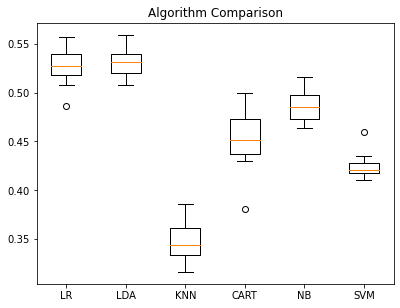

In [115]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


In [116]:
print('===Testing results for LR ====')
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train,Y_train)
predictions = lr.predict(X_validation)
print("=======LR Accuracy=========")
print(accuracy_score(Y_validation, predictions)*100)
print()
print('\n==== LR Confusion Matrix=====')
print(confusion_matrix(Y_validation, predictions))
print()
print("\n======= LR Classification Report=========")
print(classification_report(Y_validation,predictions))
print()


===Testing results for LR ====
=======LR Accuracy=========
54.21166306695464


==== LR Confusion Matrix=====
[[ 40  36  14 127]
 [  8  63  20 118]
 [ 10  26  65  21]
 [ 14  25   5 334]]


======= LR Classification Report=========
              precision    recall  f1-score   support

      others       0.56      0.18      0.28       217
         pop       0.42      0.30      0.35       209
         rap       0.62      0.53      0.58       122
        rock       0.56      0.88      0.68       378

    accuracy                           0.54       926
   macro avg       0.54      0.48      0.47       926
weighted avg       0.53      0.54      0.50       926




In [117]:
print('===Testing results for LR ====')
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train,Y_train)
predictions = lr.predict(X_validation)
print("=======LR Accuracy=========")
print(accuracy_score(Y_validation, predictions)*100)
print()
print('\n==== LR Confusion Matrix=====')
print(confusion_matrix(Y_validation, predictions))
print()
print("\n======= LR Classification Report=========")
print(classification_report(Y_validation,predictions))
print()

===Testing results for LR ====
=======LR Accuracy=========
54.21166306695464


==== LR Confusion Matrix=====
[[ 40  36  14 127]
 [  8  63  20 118]
 [ 10  26  65  21]
 [ 14  25   5 334]]


======= LR Classification Report=========
              precision    recall  f1-score   support

      others       0.56      0.18      0.28       217
         pop       0.42      0.30      0.35       209
         rap       0.62      0.53      0.58       122
        rock       0.56      0.88      0.68       378

    accuracy                           0.54       926
   macro avg       0.54      0.48      0.47       926
weighted avg       0.53      0.54      0.50       926




## **Unsupervised Learning**

## Content-based recommender using songs' lyrics

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
tfidf = TfidfVectorizer(stop_words=stop_words_all)

lyrics = df['lyrics'].dropna()
lyrics.reset_index(drop=True, inplace=True)

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(lyrics)

display(tfidf_matrix)

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine_sim

In [ ]:
indices = pd.Series(lyrics.index, index=df.dropna()['title']).drop_duplicates()

In [ ]:
def get_song_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwise similarity scores of all songs
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar ones
    sim_scores = sim_scores[1:11]

    # Get the songs indices
    songs_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar results
    return df['title'].iloc[songs_indices]

In [ ]:
get_song_recommendations('Easier')

In [ ]:
def get_lyrics_recommendations(keywords):
    lyrics = df['lyrics'].dropna()
    lyrics.reset_index(drop=True, inplace=True)
    lyrics.loc[len(lyrics.index)] = str(keywords)

    # Construct the required TF-IDF matrix by fitting and transforming the data
    tfidf_matrix = tfidf.fit_transform(lyrics)

    # Compute the cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)    

    # Get the pairwsie similarity scores of all songs
    sim_scores = list(enumerate(cosine_sim[lyrics.index[-1]]))
    
    # # Sort based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # # Get the scores of the 10 most similar ones
    sim_scores = sim_scores[1:11]

    # # Get the songs indices
    lyrics_indices = [i[0] for i in sim_scores]

    # # Return the top 10 most similar results
    return lyrics.iloc[lyrics_indices]

In [ ]:
pd.set_option('display.expand_frame_repr', False)
rec = get_lyrics_recommendations('love heartache reciprocate').reset_index()
rec

## Content-based recommender using songs's features

### _Clustering on all 15 features_

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
df_cluster = df.drop(['title', 'primary_artist','key','mode','genres','lyrics','duration_s'], axis=1)
columns = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "nltk", "Happy", "Angry", "Surprise", "Sad", "Fear"]
df_cluster = df_cluster[columns]
df_cluster.dropna(inplace=True)
df_cluster.reset_index(drop=True, inplace=True)
df_cluster

In [ ]:
x = df_cluster.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
visualizer.fit(x_scaled)

score = visualizer.elbow_score_
value = visualizer.elbow_value_

In [ ]:
clustering_kmeans = KMeans(n_clusters=2, random_state=0)
df_cluster['clusters'] = clustering_kmeans.fit_predict(df_cluster)

In [ ]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_cluster)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df_cluster['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
df_cluster_0 = df_cluster[df_cluster['clusters']==0]
df_cluster_1 = df_cluster[df_cluster['clusters']==1]
display(df_cluster_0.describe())
display(df_cluster_1.describe())

In [ ]:
clustering_kmeans = KMeans(n_clusters=3, random_state=0)
df_cluster['clusters'] = clustering_kmeans.fit_predict(df_cluster)

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_cluster)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df_cluster['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

df_cluster_0 = df_cluster[df_cluster['clusters']==0]
df_cluster_1 = df_cluster[df_cluster['clusters']==1]
df_cluster_2 = df_cluster[df_cluster['clusters']==2]

display(df_cluster_0.describe())
display(df_cluster_1.describe())
display(df_cluster_2.describe())

### _Finding the ideal number of clusters using Elbow Method_

In [ ]:
df_cluster = df.drop(['title', 'primary_artist','key','mode','genres','lyrics','duration_s'], axis=1)
columns = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "nltk", "Happy", "Angry", "Surprise", "Sad", "Fear"]
df_cluster = df[columns]
df_cluster.dropna(inplace=True)
df_cluster.reset_index(drop=True, inplace=True)
df_cluster

In [ ]:
from itertools import combinations, permutations

comb = combinations(columns, 3)
output = set(map(lambda x: tuple(sorted(x)),comb))

column_names = ["features", "score", "elbow"]
df2 = pd.DataFrame(columns = column_names)

In [ ]:
for i in list(output):
    try:
        df1 = df_cluster[[ i[0], i[1], i[2] ]]
        x = df1.values 
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)

        model = KMeans(random_state=0)
        visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
        visualizer.fit(x_scaled)

        score = visualizer.elbow_score_
        value = visualizer.elbow_value_
        if score > 0.4:
            # visualizer.show()
            idx = df1.columns
            mylist = idx.tolist()
            dict = {
                "features": mylist,
                "score": score,
                "elbow": value
            }
            df2 = df2.append(dict, ignore_index=True)
    except: 
        print("Input error")

In [ ]:
# path = './data'
# elbow_df = pd.read_csv(path+'/elbow_cluster_combinations.csv')
display(elbow_df[elbow_df['elbow']==3].sort_values(by='score', ascending=False)[:10])

In [ ]:
kmeans = KMeans(init="k-means++",
                n_clusters=2,
                random_state=42,
                max_iter = 500).fit(x_scaled)
new_df_cluster = df_cluster.copy()
new_df_cluster['kmeans'] = kmeans.labels_
new_df_cluster = new_df_cluster[['instrumentalness', 'nltk', 'speechiness', 'kmeans']]
new_df_cluster

In [ ]:
# import plotly.express as px

kmeans = new_df_cluster['kmeans']
df_cluster['kmeans'] = kmeans

fig = px.scatter_3d(df_cluster, x='instrumentalness', y='nltk', z='speechiness',
              color='kmeans')
fig.show()

# Violin Plot for each cluster 
c0 = new_df_cluster[new_df_cluster['kmeans']==0]
c1 = new_df_cluster[new_df_cluster['kmeans']==1]

c0.drop(['kmeans'], axis=1, inplace=True)
c1.drop(['kmeans'], axis=1, inplace=True)
# c2.drop(['kmeans'], axis=1, inplace=True)
# c3.drop(['kmeans'], axis=1, inplace=True)


x = c0.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
c0_scaled = min_max_scaler.fit_transform(x)
c0 = pd.DataFrame(c0_scaled)
c0.columns = ['instrumentalness', 'nltk', 'valence']
c0=c0.melt(var_name='groups', value_name='vals')

x = c1.values 
min_max_scaler = preprocessing.MinMaxScaler()
c1_scaled = min_max_scaler.fit_transform(x)
c1 = pd.DataFrame(c1_scaled)
c1.columns = ['instrumentalness', 'nltk', 'valence']
c1=c1.melt(var_name='groups', value_name='vals')

f, axes = plt.subplots(2, 1)
ax = sns.violinplot( data=c0 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[0])
ax = sns.violinplot( data=c1 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[1])
# ax = sns.violinplot( data=c2 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[2])
# ax = sns.violinplot( data=c3 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[3])

plt.show()

In [ ]:
df_cluster_0 = df_cluster[df_cluster['kmeans']==0]
df_cluster_1 = df_cluster[df_cluster['kmeans']==1]
display(df_cluster_0.describe())
display(df_cluster_1.describe())

### Try more number of clusters

In [ ]:
kmeans = KMeans(init="k-means++",
                n_clusters=3,
                random_state=42,
                max_iter = 500).fit(x_scaled)
new_df_cluster = df_cluster.copy()
new_df_cluster['kmeans'] = kmeans.labels_
new_df_cluster = new_df_cluster[['acousticness', 'instrumentalness', 'speechiness', 'kmeans']]
new_df_cluster

In [ ]:
kmeans = new_df_cluster['kmeans']
df_cluster['kmeans'] = kmeans

fig = px.scatter_3d(df_cluster, x='acousticness', y='instrumentalness', z='speechiness',
              color='kmeans')
fig.show()

# Violin Plot for each cluster 
c0 = new_df_cluster[new_df_cluster['kmeans']==0]
c1 = new_df_cluster[new_df_cluster['kmeans']==1]
c2 = new_df_cluster[new_df_cluster['kmeans']==2]

c0.drop(['kmeans'], axis=1, inplace=True)
c1.drop(['kmeans'], axis=1, inplace=True)
c2.drop(['kmeans'], axis=1, inplace=True)

x = c0.values
min_max_scaler = preprocessing.MinMaxScaler()
c0_scaled = min_max_scaler.fit_transform(x)
c0 = pd.DataFrame(c0_scaled)
c0.columns = ['acousticness', 'instrumentalness', 'speechiness']
c0=c0.melt(var_name='groups', value_name='vals')

x = c1.values 
min_max_scaler = preprocessing.MinMaxScaler()
c1_scaled = min_max_scaler.fit_transform(x)
c1 = pd.DataFrame(c1_scaled)
c1.columns = ['acousticness', 'instrumentalness', 'speechiness']
c1=c1.melt(var_name='groups', value_name='vals')

x = c2.values 
min_max_scaler = preprocessing.MinMaxScaler()
c2_scaled = min_max_scaler.fit_transform(x)
c2 = pd.DataFrame(c2_scaled)
c2.columns = ['acousticness', 'instrumentalness', 'speechiness']
c2=c2.melt(var_name='groups', value_name='vals')

f, axes = plt.subplots(3, 1)
ax = sns.violinplot( data=c0 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[0])
ax = sns.violinplot( data=c1 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[1])
ax = sns.violinplot( data=c2 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[2])

plt.show()

In [ ]:
kmeans = KMeans(init="k-means++",
                n_clusters=4,
                random_state=42,
                max_iter = 500).fit(x_scaled)
new_df_cluster = df_cluster.copy()
new_df_cluster['kmeans'] = kmeans.labels_
new_df_cluster = new_df_cluster[['instrumentalness', 'loudness', 'speechiness', 'kmeans']]
new_df_cluster

In [ ]:
# Looking at statistical distribution of the data in each column for each cluster
pd.set_option('display.max_columns', None)
df_cluster_0 = df_cluster[df_cluster['kmeans']==0]
df_cluster_1 = df_cluster[df_cluster['kmeans']==1]
df_cluster_2 = df_cluster[df_cluster['kmeans']==2]

# display(df_cluster.describe().loc[['mean']])
display(df_cluster_0.describe().loc[['mean']])
display(df_cluster_1.describe().loc[['mean']])
display(df_cluster_2.describe().loc[['mean']])

In [ ]:
kmeans = new_df_cluster['kmeans']
df_cluster['kmeans'] = kmeans

fig = px.scatter_3d(df_cluster, x='instrumentalness', y='loudness', z='speechiness',
              color='kmeans')
fig.show()

# Violin Plot for each cluster 
c0 = new_df_cluster[new_df_cluster['kmeans']==0]
c1 = new_df_cluster[new_df_cluster['kmeans']==1]
c2 = new_df_cluster[new_df_cluster['kmeans']==2]
c3 = new_df_cluster[new_df_cluster['kmeans']==3]

c0.drop(['kmeans'], axis=1, inplace=True)
c1.drop(['kmeans'], axis=1, inplace=True)
c2.drop(['kmeans'], axis=1, inplace=True)
c3.drop(['kmeans'], axis=1, inplace=True)

x = c0.values
min_max_scaler = preprocessing.MinMaxScaler()
c0_scaled = min_max_scaler.fit_transform(x)
c0 = pd.DataFrame(c0_scaled)
c0.columns = ['instrumentalness', 'loudness', 'speechiness']
c0=c0.melt(var_name='groups', value_name='vals')

x = c1.values 
min_max_scaler = preprocessing.MinMaxScaler()
c1_scaled = min_max_scaler.fit_transform(x)
c1 = pd.DataFrame(c1_scaled)
c1.columns = ['instrumentalness', 'loudness', 'speechiness']
c1=c1.melt(var_name='groups', value_name='vals')

x = c2.values 
min_max_scaler = preprocessing.MinMaxScaler()
c2_scaled = min_max_scaler.fit_transform(x)
c2 = pd.DataFrame(c2_scaled)
c2.columns = ['instrumentalness', 'loudness', 'speechiness']
c2=c2.melt(var_name='groups', value_name='vals')

x = c3.values 
min_max_scaler = preprocessing.MinMaxScaler()
c3_scaled = min_max_scaler.fit_transform(x)
c3 = pd.DataFrame(c3_scaled)
c3.columns = ['instrumentalness', 'loudness', 'speechiness']
c3=c3.melt(var_name='groups', value_name='vals')

f, axes = plt.subplots(4, 1)
ax = sns.violinplot( data=c0 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[0])
ax = sns.violinplot( data=c1 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[1])
ax = sns.violinplot( data=c2 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[2])
ax = sns.violinplot( data=c3 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[3])

plt.show()

### _4 clusters do not yield great results!_

## Auto-generate lyrics using Keras module of Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [ ]:
tokenizer = Tokenizer()

lyrics_list = df['lyrics'].to_list()
lyrics_data = " ".join(map(str,lyrics_list))
corpus = lyrics_data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

In [ ]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[: i+1]
        input_sequences.append(n_gram_sequence)

In [ ]:
n_gram_sequence
input_sequences

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences_arr = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
xs, labels = input_sequences_arr[:, :-1], input_sequences_arr[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.show

In [ ]:
plot_graphs(history, 'accuracy');

In [ ]:
seed_text = 'I miss you so much'
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ''
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += ' ' + output_word

print(seed_text)

# *References*

https://stackoverflow.com/

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering

https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering

https://towardsdatascience.com/spotify-genre-classification-algorithm-88051db23d42